In [1]:
# Required Packages
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [50]:
# Reading the nii file(which was generated from dcm file using dcm2niix utility in bash for anaconda)
# The "\\" in the directory name is important
t1_img = nib.load("nifti\\dcm_anat_ses-01_T1w_20190219111436_5.nii")

In [19]:
# Header contains the metadata information about the image
t1_hdr = t1_img.header
print(t1_hdr)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 192 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.         0.90000004 0.859375   0.859375   2.3        0.
 0.         0.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'TE=3.1;Time=112922.273;phase=1'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.15146269
quatern_c       : 0.011705771
quatern_d       : -0.0024157318
qoffset

In [20]:
t1_hdr.keys()

['sizeof_hdr',
 'data_type',
 'db_name',
 'extents',
 'session_error',
 'regular',
 'dim_info',
 'dim',
 'intent_p1',
 'intent_p2',
 'intent_p3',
 'intent_code',
 'datatype',
 'bitpix',
 'slice_start',
 'pixdim',
 'vox_offset',
 'scl_slope',
 'scl_inter',
 'slice_end',
 'slice_code',
 'xyzt_units',
 'cal_max',
 'cal_min',
 'slice_duration',
 'toffset',
 'glmax',
 'glmin',
 'descrip',
 'aux_file',
 'qform_code',
 'sform_code',
 'quatern_b',
 'quatern_c',
 'quatern_d',
 'qoffset_x',
 'qoffset_y',
 'qoffset_z',
 'srow_x',
 'srow_y',
 'srow_z',
 'intent_name',
 'magic']

In [21]:
t1_hdr["pixdim"]

array([1.        , 0.90000004, 0.859375  , 0.859375  , 2.3       ,
       0.        , 0.        , 0.        ], dtype=float32)

In [22]:
# It is the matrix containing information about the image
t1_data = t1_img.get_fdata()
t1_data

memmap([[[ 4.,  7.,  3., ...,  3.,  3.,  0.],
         [ 1.,  6.,  2., ...,  2.,  4.,  0.],
         [ 4.,  4.,  2., ...,  6.,  5.,  0.],
         ...,
         [ 6.,  1.,  9., ...,  3.,  6.,  0.],
         [ 2.,  3.,  6., ...,  7.,  2.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 4.,  5.,  0., ...,  3.,  1.,  0.],
         [ 2.,  1.,  8., ...,  4.,  1.,  0.],
         [ 5.,  1.,  8., ...,  3.,  4.,  0.],
         ...,
         [10., 19.,  2., ...,  0.,  2.,  0.],
         [ 5.,  3.,  3., ...,  3.,  4.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 1.,  2.,  3., ...,  2.,  1.,  0.],
         [ 2.,  4.,  9., ...,  2.,  8.,  0.],
         [ 7.,  7.,  9., ...,  4.,  4.,  0.],
         ...,
         [ 1.,  2.,  9., ...,  1.,  0.,  0.],
         [ 5.,  8.,  7., ...,  2.,  1.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        ...,

        [[ 7.,  2.,  4., ...,  1.,  3.,  0.],
         [ 7.,  4.,  5., ...,  3.,  4.,  0.],
         [ 7.,  3.

In [23]:
# The image data is a numpy array
type(t1_data)

numpy.memmap

In [27]:
# Dimensions of t1_data
t1_data.ndim

3

In [30]:
# It indicates the brain was scanned in 192 slices with resolution 256 x 256 voxels per slice.
# Voxel is volumetric pixel which is the 3D analogue of 2D pixel
# It means we have 192 2D images of the brain, if we stitch them together we will get a long cubical pixel which we are calling as Voxel
# Here the value of a point in the 2D image is a part of the cubical Voxel(which is of the size 192).
# But! When refering we are refering the value of a point in the 2D image as a Voxel(Just to indicate it is not a simple pixel, it is a part of something more informative than that)
t1_data.shape

(192, 256, 256)

In [31]:
# Each element of the array is a floating-point number
t1_data.dtype

dtype('float64')

In [35]:
# Smaller the value - Darker the voxel
# Larger the value - Brighter the voxel
print(np.min(t1_data))
print(np.max(t1_data))

0.0
1964.0


In [37]:
# Value of the (20, 3) voxel of the 10th brain slice in the X-axis
t1_data[9, 19, 2]

8.0

In [40]:
x_slice = t1_data[9, :, :] # Pulled the 10th slice from X-axis
y_slice = t1_data[:, 19, :] # Pulled the 20th slice from Y-axis
z_slice = t1_data[:, :, 2] # Pulled the 3rd slice from Z-axis

In [42]:
%matplotlib inline

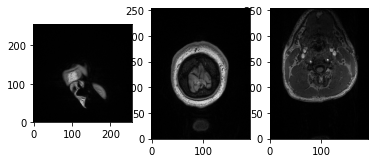

In [43]:
# Here we will visualize the slices we obtained mapped to gray and lower values indicates darker
slices = [x_slice, y_slice, z_slice]

fig, axes = plt.subplots(1, len(slices)) # equiv to par(mfrow = c(1, 3))
for i, slice in enumerate(slices):
    axes[i].imshow(slice.T, cmap = "gray", origin = "lower")

In [44]:
# Affine Matrix is the meta data associated with the 3D image
# Even though we refered teh 1st, 2nd and 3rd dims of the image matrix as X, Y, Z
# We don't know the actual dimensions(cm, etc.), left or right, up or down, back of front
# The affine matrix allows to translate between voxel coordinates in (x, y, z) and world space coordinates(left/right, bottom/up, back/front).
# Usually it depends on how we constructed the affine matrix, but in this case it always refers to (Right, Anterior, Superior). Remember "RAS"
# Applying the affine matrix(t1_affine) is done through using a linear map(matrix multiplication) on voxel coordinates(defined in t1_data)
# Increasing the coordinate value of the first dimension corresponds to moving to the right of the person being scanned
t1_affine = t1_img.affine
t1_affine

array([[ 8.99742126e-01,  1.05651410e-03,  2.05146018e-02,
        -9.00501099e+01],
       [-7.48920813e-03,  8.19935203e-01,  2.57255703e-01,
        -1.43966370e+02],
       [-2.01671515e-02, -2.57352889e-01,  8.19709778e-01,
        -7.67913361e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])